# Visualization

Various aspects of the contraction process can be visualized using the following functions.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import cotengra as ctg

# generate an equation representing a 2D lattice
inputs, output, shapes, size_dict = ctg.utils.lattice_equation([5, 6])

## Hypergraph visualization

The first visualization we can do is to visualize the hypergraph corresponding
to the geometry of the tensor network or equation with 
[`HyperGraph.plot`](cotengra.plot.plot_hypergraph):

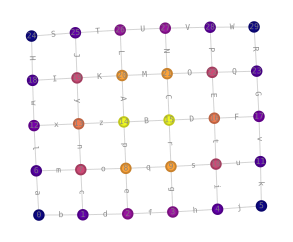

In [2]:
hg = ctg.get_hypergraph(inputs, output, size_dict)
hg.plot(draw_edge_labels=True)

The default coloring of the nodes shows a simple centrality measure.

```{note}
Hyper edges are shown as a zero size vertex connecting the tensors they appear 
on, like a COPY-tensor.
```

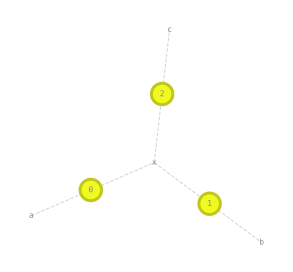

In [3]:
ctg.get_hypergraph(['ax', 'bx', 'cx']).plot(draw_edge_labels=True)

## Optimizer trials visualization

If we run an hyper optimizer, we can visualize how the scores progress with trials using the
[`HyperOptimizer.plot_trials`](cotengra.plot.plot_trials) method:

In [4]:
opt = ctg.HyperOptimizer(methods=['greedy', 'kahypar', 'labels'], progbar=True)

# run it and generate a tree
tree = opt.search(inputs, output, size_dict)

log2[SIZE]: 6.00 log10[FLOPs]: 3.80: 100%|██████████| 128/128 [00:02<00:00, 50.78it/s]


By default the y-axis is the objective score, but you can specify e.g. `'flops'`':

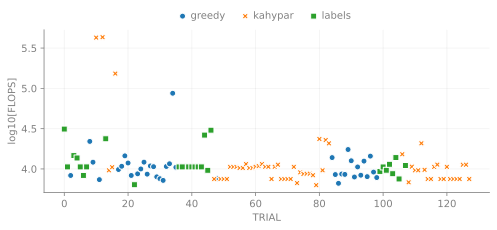

In [5]:
opt.plot_trials('flops')

We can also plot the distribution of contraction costs against contraction widths using
the [`HyperOptimizer.plot_scatter`](cotengra.plot.plot_scatter) method:

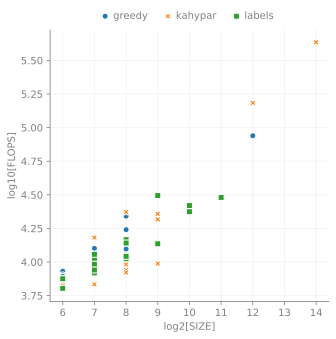

In [6]:
opt.plot_scatter(x='size', y='flops')

## Tree visualizations

The following visualization functions are available for inspecting a single,
complete [`ContractionTree`](cotengra.core.ContractionTree) once generated.
They mostly wrap [`plot_tree`](cotengra.plot.plot_tree), where you can see
most of the extra options.

### Tent

The most general purpose visualization for a 
[`ContractionTree`](cotengra.core.ContractionTree) is 
the [`ContractionTree.plot_tent`](cotengra.plot.plot_tent) method.
This plots the input network (in grey) at the bottom, and the contraction tree
intermediates laid out above. The width and color of the tree edges denote the 
intermediate tensor widths, and the size and color of the tree nodes denote the
FLOPs required to contract each intermediate tensor:

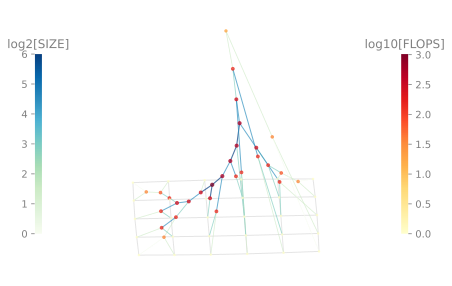

In [7]:
tree.plot_tent()

If you supply `order=True` then the intermediate nodes will be in the exact vertical order than they would be performed:

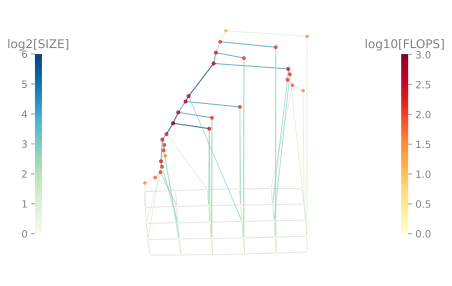

In [8]:
tree.plot_tent(order=True)

```{note}
If you have sliced indices, these will appear as dashed lines in the input graph.
```


### Ring

Another option is the [`ContractionTree.plot_ring`](cotengra.plot.plot_ring) 
method which lays out the input network on a ring, with the contraction
tree intermediates laid out towards the center. The more arcs cross between
branches the more expensive that contraction. This can be useful for 
inspecting how many 'spines' a contraction has or how *balanced* it is:

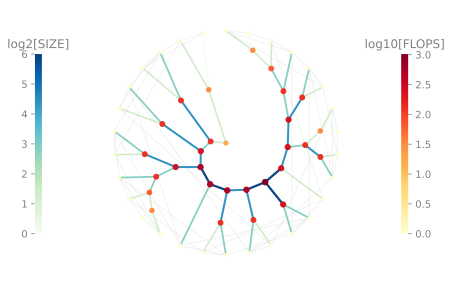

In [9]:
tree.plot_ring()


### Rubberband

For small and close to planar graphs, an alternative visualization is the 
[`ContractionTree.plot_rubberband`](cotengra.plot.plot_rubberband) method.
method from the [`hypernetx`](https://github.com/pnnl/HyperNetX) 
package. Here, nodes of the input graph are hierarchically grouped into bands 
according to the contraction tree. The order of contraction is represented by
the colors:

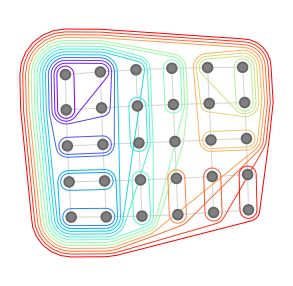

In [10]:
tree.plot_rubberband()

All of the above methods can be pretty extensively customized, including by
supplying custom colormaps. Most also take a `return_fig` kwarg which can be 
used to return the `matplotlib` figure for more customization.

In [11]:
inputs, output, shapes, size_dict = ctg.utils.lattice_equation([5, 5, 5])
opt = ctg.HyperOptimizer(progbar=True, reconf_opts={}, minimize='combo-256')
tree = opt.search(inputs, output, size_dict)

log2[SIZE]: 30.00 log10[FLOPs]: 12.53: 100%|██████████| 128/128 [02:13<00:00,  1.04s/it]


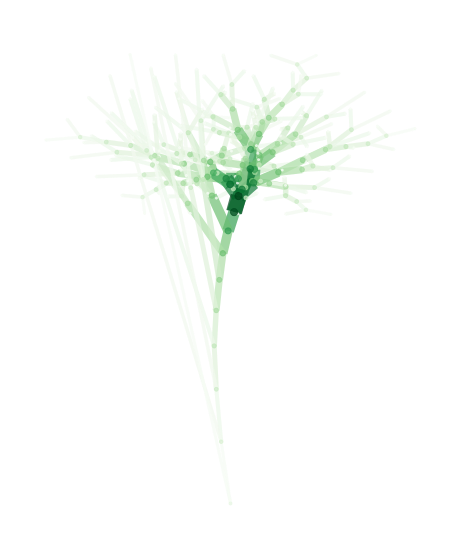

In [12]:
tree.plot_tent(
    raw_edge_alpha=0.0,
    edge_colormap='Greens',
    node_colormap='Greens',
    edge_scale=2,
    node_scale=0.5,
    colorbars=False,
    tree_root_height=-1.0,
    figsize=(10, 10),
)